In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.initializers import glorot_uniform

In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from keras import optimizers

In [4]:
 from keras.applications.vgg16 import VGG16

In [5]:
 from keras.applications.xception import Xception

In [6]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [7]:
from PIL import Image

In [8]:
import matplotlib.pyplot as plt

In [9]:
import tensorflow as tf
import os

os.chdir('/content/drive/MyDrive')

In [ ]:
base_model = VGG16(weights='imagenet')

133693440/553467096 [======>.......................] - ETA: 2s

In [ ]:
class FeatureExtractor:
  def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

  def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [10]:
class FeatureExtractor:
  def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        # Customize the model to return features from fully-connected layer
        self.model = tf.keras.models.load_model("image simillarity_vgg.h5")

  def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [11]:
fe=FeatureExtractor()

In [ ]:
file_list = os.listdir('쇼핑몰_크롤링_20개/쇼핑몰_크롭데이터셋/수달쌀롱_크롭')

In [ ]:
len(file_list)

1319

In [ ]:
print(file_list[0])

수달쌀롱_1_crop.jpg


In [12]:
file_list = os.listdir('result3/8')

In [ ]:
for j in range(9):
  file_list = os.listdir('result3/'+str(j))
  features = []
  img_paths = []

# Save Image Feature Vector with Database Images
  for i in range(len(file_list)):
    if i%100 == 0:
      print(i)
    try:
      image_path = "result3/"+str(j)+"/"+file_list[i]
      img_paths.append(image_path)

    # Extract Features
      feature = fe.extract(img=Image.open(image_path))

      features.append(feature)

    # Save the Numpy array (.npy) on designated path
      #feature_path = "./class_array/"+str(j)+"/f" + str(i) + ".npy"
      #np.save("./class_array/"+str(j)+"/p" + str(i) + ".npy",image_path)
      #np.save(feature_path, feature)
    except Exception as e:
      print('예외가 발생했습니다.', e)
  np.save("./class_array/"+str(j)+"/all_p_final.npy",img_paths)
  np.save("./class_array/"+str(j)+"/all_f_final.npy", features)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
0
100
200
300
400
500
600
700
800
900
1000
1100
0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
0
100
200
300
400
500
600
700
800
900
1000
1100
0
100
200
300


In [13]:

features2 = []
img_paths2 = []

# Save Image Feature Vector with Database Images
for i in range(len(file_list)):
  if i%100 == 0:
    print(i)
  try:
    image_path = "result3/8/"+file_list[i]
    img_paths2.append(image_path)

    # Extract Features
    feature = fe.extract(img=Image.open(image_path))

    features2.append(feature)

    # Save the Numpy array (.npy) on designated path
    #feature_path = "./class_array/8/f" + str(i) + ".npy"
    #np.save("./class_array/8/p" + str(i) + ".npy",image_path)
    #np.save(feature_path, feature)
  except Exception as e:
    print('예외가 발생했습니다.', e)
#np.save("./class_array/8/all_f.npy",img_paths)
#np.save("./class_array/8/all_p.npy", features)

0
100
200
300


In [14]:
features1=np.load("class_array/8/all_f_final.npy")
paths1=np.load("class_array/8/all_p_final.npy")

In [15]:
features1[0]

array([0.        , 0.02302362, 0.        , ..., 0.        , 0.02546357,
       0.01763002], dtype=float32)

In [16]:
paths1[0]

'result3/8/기프티박스_1004_crop.jpg'

In [17]:
img_paths2[0]

'result3/8/기프티박스_1004_crop.jpg'

In [18]:
features2[0]

array([0.        , 0.02302362, 0.        , ..., 0.        , 0.02546357,
       0.01763002], dtype=float32)

In [ ]:
features2[0]==features1[0]

In [ ]:
img_paths2[0]

'result2/8/코스15_crop.jpg'

In [ ]:
features2[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.00330675,
       0.08156732], dtype=float32)

In [ ]:
import collections

In [ ]:
print(collections.Counter(features2[0]==features1[0]))

Counter({True: 4096})


In [ ]:
len(img_paths)

549

In [ ]:
features

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img = Image.open("adadad2.jpg")
query = fe.extract(img)
query

array([2.75484957e-13, 8.93889997e-13, 3.18721085e-08, 1.02802234e-18,
       2.68414524e-16, 6.45513354e-17, 3.65728214e-21, 3.33419300e-18,
       2.69568168e-14, 2.67803089e-11, 1.60083127e-11, 4.86288180e-16,
       1.92746426e-11, 1.57302584e-13, 4.07620337e-18, 2.40445315e-18,
       1.00796579e-10, 1.61930608e-11, 1.59511093e-14, 5.14538171e-17,
       9.29411120e-18, 9.38635238e-19, 6.66496329e-12, 1.00978956e-11,
       8.68396847e-12, 2.24077753e-11, 8.05610389e-16, 8.07399069e-13,
       1.95338049e-13, 3.60626739e-16, 1.65872080e-16, 1.04057605e-12,
       7.41045237e-17, 9.26056454e-10, 1.05028538e-11, 1.72639155e-14,
       6.64087925e-12, 4.23748051e-11, 2.23180198e-12, 1.33658089e-14,
       3.08017099e-16, 1.55170591e-15, 3.91623936e-16, 1.41850924e-15,
       3.14131598e-17, 1.50770021e-13, 2.36789704e-19, 1.91223922e-14,
       2.20960382e-15, 6.33514486e-03, 9.17519216e-09, 4.01407865e-11,
       1.01942682e-11, 2.77970896e-10, 1.74654839e-14, 6.29600871e-10,
      

In [ ]:
query.shape

(1000,)

In [ ]:
dists = np.linalg.norm(features - query, axis=1)

In [ ]:
dists.shape

(549, 10, 2048)

In [ ]:
ids = np.argsort(dists)[::6]

In [ ]:
len(ids)

92

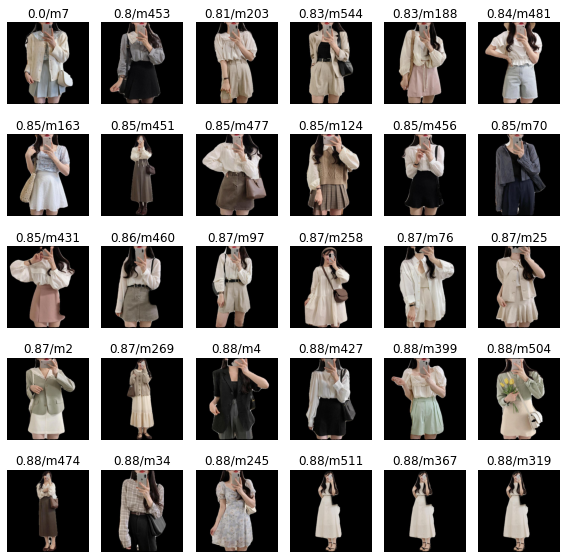

In [ ]:
img = Image.open("adadad2.jpg")
# query 유사도 추출
query = fe.extract(img)

# 유사도 계산
dists = np.linalg.norm(features - query, axis=1)

# 정렬 후 인덱스 반환
ids = np.argsort(dists)[:30]

scores = [(dists[id], img_paths[id], id) for id in ids]
# 결과 시각화
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

In [ ]:
img_paths[485]

'쇼핑몰_크롤링_20개/쇼핑몰_크롭데이터셋/수달쌀롱_크롭/수달쌀롱_488_crop.jpg'

In [ ]:
Image.open()

In [ ]:
score[1]

'쇼핑몰_크롤링_20개/쇼핑몰_크롭데이터셋/럽앤썸_크롭/럽앤썸_273_crop.jpg'

In [ ]:
query

array([0.        , 0.04641955, 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
dists

array([0.6813562 , 0.35676834, 0.25734273, ..., 0.1579328 , 0.17826374,
       0.1996854 ], dtype=float32)

In [ ]:
features[0]

array([0.        , 0.06576984, 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
base_model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output).summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
Model.summary(self=Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output))

In [ ]:
Model.summary(base_model)

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output).save("image simillarity_vgg.h5")

In [ ]:
new_model = tf.keras.models.load_model("image simillarity_1.h5")

In [ ]:
new_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
features[0]

array([0.0000000e+00, 8.7842748e-02, 0.0000000e+00, ..., 1.4120052e-03,
       9.9201119e-03, 1.9496645e-05], dtype=float32)